## Bootstrap Sampling

In summary, bootstrap is a computer intensive technique to assess the accuracy of estimates. Because it does not rely on parametric, i.e. normality assumptions, it is empirically based on the data available, it can applied to different statistics and different distributions. Here we will discuss empirical non-parametric bootstrap and mention the two most common methods to determine confidence intervals, the **percentile interval** and **$BC_{a}$** (bias corrected and accelerated).

In short, bootstrap assesses the accuracy of a sample statistic by applying computer intensive resampling with replacement.

1. A sample of size *n* is withdrawn from an unknown distribution _F_. </br>
  $$F \rightarrow X=(x_1, x_2,..,x_n)$$  
  
2. The sample of size n is sampled with replacement with a sample size of n _B_ times.  These are called bootstrap samples.  We will denote each sample as $X^{i}$ for i=1, 2, ...B.
 
 
3. The B bootstrap samples $X^{i}$ are used to calculate the statistic of interest $S^{i}=S(X^{i})$.


4.  The distribution of the _B_ bootstrap samples statistic $S(X^{i})$ is used to calculate the estimated confidence interval of the statistic of interest.


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
law82=pd.read_csv(r'law82.csv')
law82.head()

,Unnamed: 0,School,LSAT,GPA
0,1,1,622,3.23
1,2,2,542,2.83
2,3,3,579,3.24
3,4,4,653,3.12
4,5,5,606,3.09


In [3]:
sample_size  = 15
law15=pd.DataFrame.sample(law82,n = sample_size).reset_index()
#law15= law15.reset_index()
law15.head()

,index,Unnamed: 0,School,LSAT,GPA
0,4,5,5,606,3.09
1,53,54,54,594,3.05
2,55,56,56,641,3.28
3,81,82,82,575,2.74
4,13,14,14,581,3.22


Create a histogram to see the shape of the original data

Text(0, 0.5, 'Frequency')

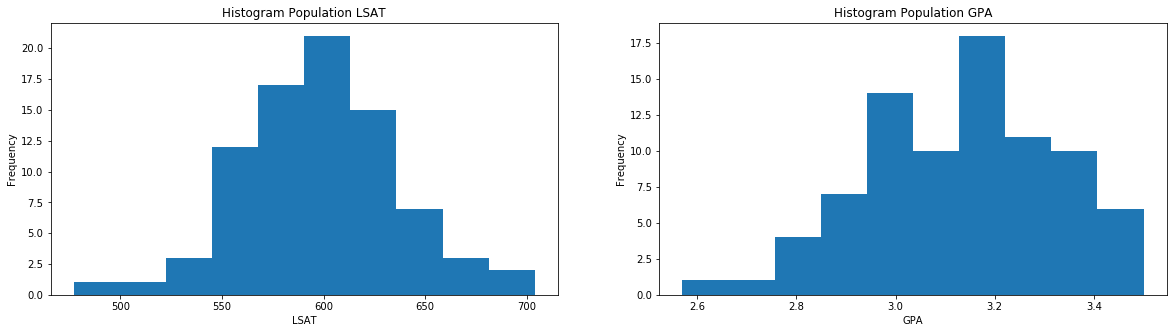

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(law82.LSAT)
plt.title('Histogram Population LSAT')
plt.xlabel('LSAT')
plt.ylabel('Frequency')


plt.subplot(122)
plt.hist(law82.GPA)
plt.title('Histogram Population GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

(477, 704)

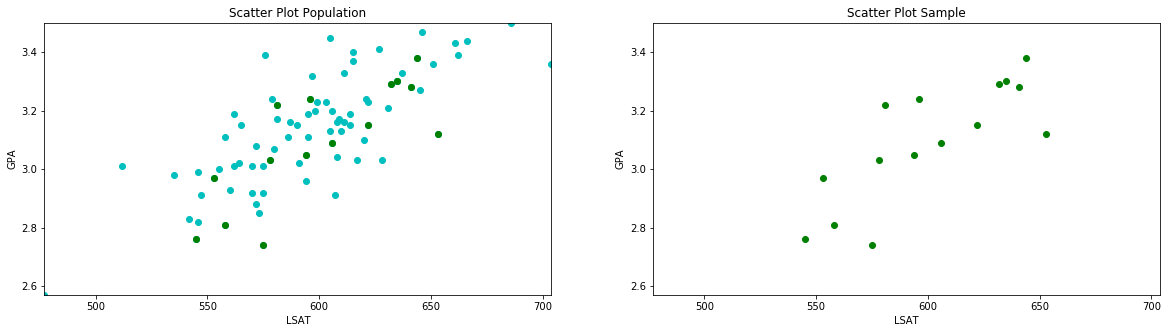

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(law82.LSAT,law82.GPA,color='c')
plt.scatter(law15.LSAT,law15.GPA,color='green')
plt.title('Scatter Plot Population')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.ylim(law82.GPA.min(),law82.GPA.max())
plt.xlim(law82.LSAT.min(),law82.LSAT.max())

plt.subplot(122)
plt.scatter(law15.LSAT,law15.GPA,color='green')
plt.title('Scatter Plot Sample')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.ylim(law82.GPA.min(),law82.GPA.max())
plt.xlim(law82.LSAT.min(),law82.LSAT.max())

We will calculate an interval confidence for the correlation using the bootstrap resampling method. First we will calculate the correlation for the original dataset and the sample.

In [6]:
corr_pop=law82['LSAT'].corr(law82['GPA'])
print("Population LSAT vs. GPA correlation: %.4f"  % corr_pop)

Population LSAT vs. GPA correlation: 0.7600


In [7]:
# Create a file to use it as index

index_law82=np.arange(0,law82.shape[0]) #law82.shape[0] counts the number of rows (records)
index_law82

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [8]:
LSAT=law82['LSAT']
GPA=law82['GPA']

#Create a df for the sampling distribution of correlations
#set the number of bootstraps
B=3200

corr_sampling_dist_pop=[]

for i in np.arange(0,B):
    #pick 15 rows (indexes) randomly with replacement (default)
    pop_sample_idx=np.random.choice(law82.shape[0],15,replace=True)


    # sample the records that match with the index
    random_sampling_pop=(LSAT[pop_sample_idx],GPA[pop_sample_idx])

    #calculate the correlation of the sample
    corr_sample_pop=random_sampling_pop[0].corr(random_sampling_pop[1])

    #Append the new sample correlation to the sampling distribution df
    corr_sampling_dist_pop.append(corr_sample_pop)

In [9]:
LSAT=law15['LSAT']
GPA=law15['GPA']

#Create a df for the sampling distribution of correlations



corr_sampling_dist_sample=[]

for i in np.arange(0,B):
    #pick 15 rows (indexes) randomly with replacement (default)
    pop_sample_idx=np.random.choice(law15.shape[0],15,replace=True)


    # sample the records that match with the index
    random_sampling_sample=(LSAT[pop_sample_idx],GPA[pop_sample_idx])

    #calculate the correlation of the sample
    corr_sample_sample=random_sampling_sample[0].corr(random_sampling_sample[1])

    #Append the new sample correlation to the sampling distribution df
    corr_sampling_dist_sample.append(corr_sample_sample)

Text(0, 0.5, 'Frequency')

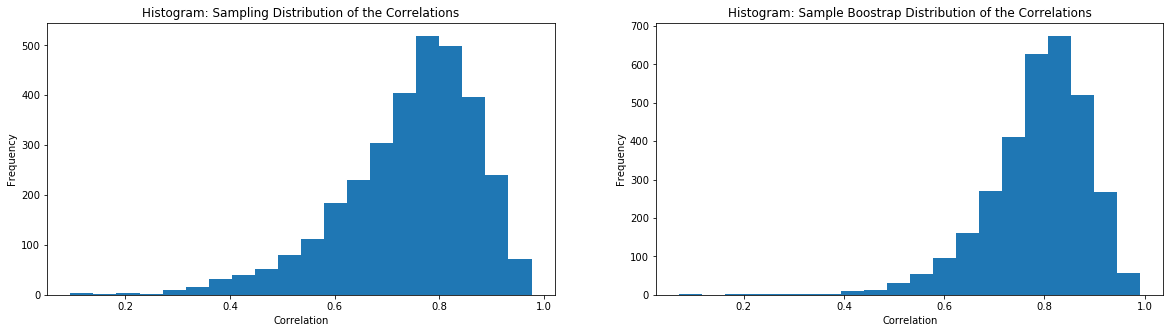

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(corr_sampling_dist_pop,bins=20)
plt.title('Histogram: Sampling Distribution of the Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
#plt.ylim(0,B/5)

plt.subplot(122)
plt.hist(corr_sampling_dist_sample,bins=20)
plt.title('Histogram: Sample Boostrap Distribution of the Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
#plt.ylim(0,B/5)


In [11]:
corr_pop=law82['LSAT'].corr(law82['GPA'])
print("Population LSAT vs. GPA correlation: %.2f"  % corr_pop)

corr_boot_mean=sum(corr_sampling_dist_sample)/len(corr_sampling_dist_sample)
error_corr_boot_mean=corr_boot_mean-corr_pop
print("Population LSAT vs. GPA bootstrap sampling: %.2f"  % corr_boot_mean,', the error vs. the true correlation is %.2f' % error_corr_boot_mean)

corr_sampling_mean=sum(corr_sampling_dist_pop)/len(corr_sampling_dist_pop)
error_corr_sampling_mean=corr_sampling_mean-corr_pop
print("Population LSAT vs. GPA population sampling: %.2f"  % corr_sampling_mean, 'the error vs. the true correlation is %.2f' % error_corr_sampling_mean)

Population LSAT vs. GPA correlation: 0.76
Population LSAT vs. GPA bootstrap sampling: 0.79 , the error vs. the true correlation is 0.03
Population LSAT vs. GPA population sampling: 0.74 the error vs. the true correlation is -0.02


In [12]:
LSAT=law82['LSAT']
LSAT.mean()

597.5487804878048

In [13]:
index_law82=np.arange(0,law82.shape[0])

In [14]:
pop_sample_idx=np.random.choice(law82.shape[0],15,replace=True)

In [15]:
pop_sample_idx

array([60,  8, 48, 65, 71,  7, 34, 78,  6, 74, 48, 70, 45, 75, 63])

In [16]:
random_sampling_sample=LSAT[pop_sample_idx]

In [17]:
random_sampling_sample.mean()

605.5333333333333

In [18]:
LSAT=law82['LSAT']
LSAT_True_Mean=LSAT.mean()

LSAT15=law15['LSAT']
LSAT_sample_Mean=LSAT15.mean()

sampling_dist_sample_LSAT=[]

B=10000

for i in np.arange(0,B):

    #create a range with the indexes of the dataframe
    index_law15=np.arange(0,law15.shape[0])

    #sample with replacement the index
    pop_sample_idx=np.random.choice(law15.shape[0],15,replace=True)

    # sample the records that match with the index
    random_sampling_sample=LSAT[pop_sample_idx]

    #append the new mean
    sampling_dist_sample_LSAT.append(random_sampling_sample.mean())
    
#plt.hist(sampling_dist_sample_LSAT)
#plt.show

In [19]:
sampling_dist_pop_LSAT=[]


for i in np.arange(0,B):

    #create a range with the indexes of the dataframe
    index_law82=np.arange(0,law82.shape[0])

    #sample with replacement the index
    pop_sample_idx=np.random.choice(law82.shape[0],15,replace=True)

    # sample the records that match with the index
    random_sampling_sample=LSAT[pop_sample_idx]

    #append the new mean
    sampling_dist_pop_LSAT.append(random_sampling_sample.mean())
    
#plt.hist(sampling_dist_pop_LSAT)
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

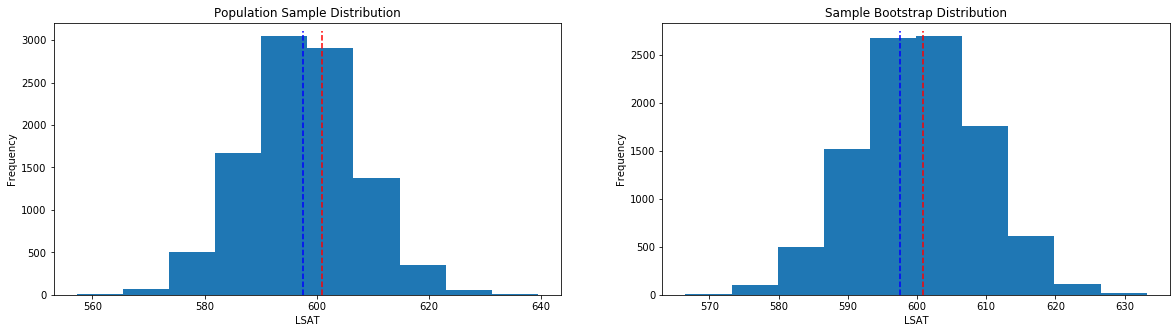

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(sampling_dist_pop_LSAT)
plt.axvline(LSAT_True_Mean,linestyle='--',color='b',ymax=0.97)
plt.axvline(LSAT_sample_Mean,linestyle='--',color='r',ymax=0.97)
plt.xlabel('LSAT')
plt.ylabel('Frequency')
plt.title('Population Sample Distribution')

plt.subplot(122)
plt.hist(sampling_dist_sample_LSAT)
plt.axvline(LSAT_True_Mean,linestyle='--',color='b',ymax=0.97)
plt.axvline(LSAT_sample_Mean,linestyle='--',color='r',ymax=0.97)
plt.xlabel('LSAT')
plt.ylabel('Frequency')
plt.title('Sample Bootstrap Distribution')
plt.show